## Crop and Fertilizer Recommendation System using ML 

In [43]:
# 📌 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# 📌 Function to load data
def load_data(file_path):
    """Load dataset from a given file path."""
    try:
        data = pd.read_csv(file_path)
        print("✅ Data loaded successfully!")
        return data
    except FileNotFoundError:
        print("❌ The file was not found. Please check the file path.")
        return None

# Example usage
file_path = r'dataset/Crop_recommendation.csv'  # Ensure correct path
crop_data = load_data(file_path)

✅ Data loaded successfully!


In [45]:
# 📌 Function to analyze dataset
def analyze_data(data):
    """Perform basic dataset analysis."""
    if data is not None:
        print("\n📌 Dataset Preview (First 5 rows):")
        print(data.head())

        print("\n📌 Dataset Shape:", data.shape)

        print("\n📌 Dataset Info:")
        data.info()

        print("\n📌 Missing Values in Each Column:")
        print(data.isnull().sum())

        print("\n📌 Number of Duplicate Rows:", data.duplicated().sum())

        print("\n📌 Descriptive Statistics:")
        print(data.describe())

        print("\n📌 Column Names:")
        print(data.columns.to_list())
    else:
        print("⚠ No data available for analysis.")

# Analyze dataset
analyze_data(crop_data)


📌 Dataset Preview (First 5 rows):
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

📌 Dataset Shape: (2200, 8)

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object

In [46]:
# 📌 Function to visualize missing data
def visualize_missing_data(data):
    """Visualize missing data as a heatmap."""
    
    # Print missing values count per column
    print("\n📊 Missing Data Count per Column:")
    print(data.isnull().sum())

    # Check if there is any missing data
    if data.isnull().sum().sum() == 0:
        print("✅ No missing data found.")
    else:
        plt.figure(figsize=(10, 6))
        sns.heatmap(data.isnull(), cbar=False, cmap="coolwarm", linewidths=0.5)
        plt.title("🔥 Missing Data Heatmap")
        plt.show()

# Visualizing missing data
visualize_missing_data(crop_data)



📊 Missing Data Count per Column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
✅ No missing data found.


In [47]:
# 📌 Function to analyze value counts of a specific column
def analyze_column(data, column_name):
    """Analyze the frequency distribution of a specific column."""
    if column_name in data.columns:
        print(f"\n📊 Value Counts in '{column_name}' Column:")
        print(data[column_name].value_counts())
    else:
        print(f"⚠ Column '{column_name}' not found.")

# Analyze value counts of the 'label' column
analyze_column(crop_data, 'label')


📊 Value Counts in 'label' Column:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


In [48]:
# 📌 Extract feature columns (excluding 'label')
features = crop_data.columns.to_list()
if 'label' in features:
    features.remove('label')

print("\n✅ Feature Columns:", features)


✅ Feature Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [ ]:
# 📌 1️⃣ Visualizing Feature Distributions
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for feature, subplot in zip(features, ax.flatten()):
    sns.histplot(crop_data[feature], ax=subplot, kde=True, color='royalblue')
    subplot.set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

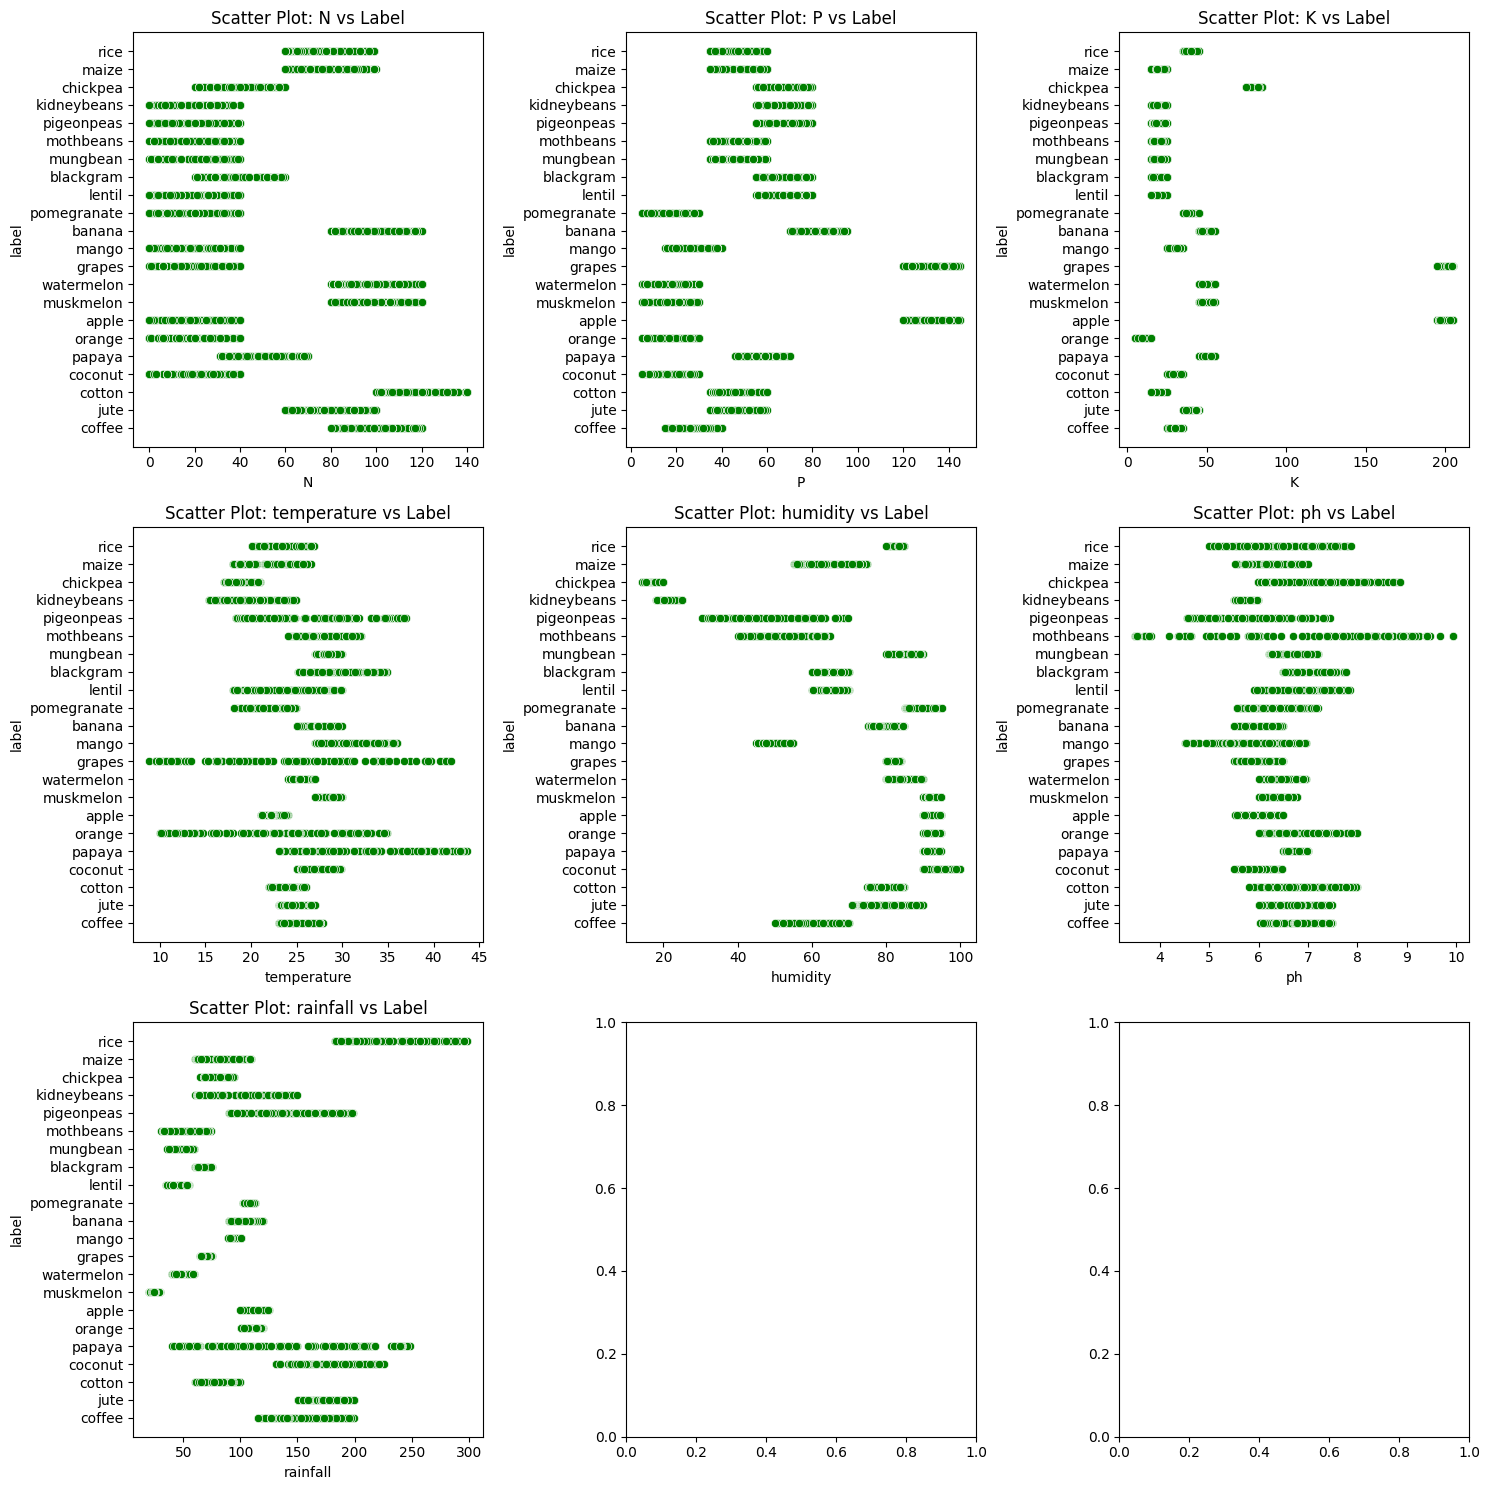

In [49]:
# 📌 2️⃣ Scatter Plots: Feature vs Label
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for feature, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=feature, y='label', data=crop_data, ax=subplot, color='green')
    subplot.set_title(f'Scatter Plot: {feature} vs Label')
plt.tight_layout()
plt.show()

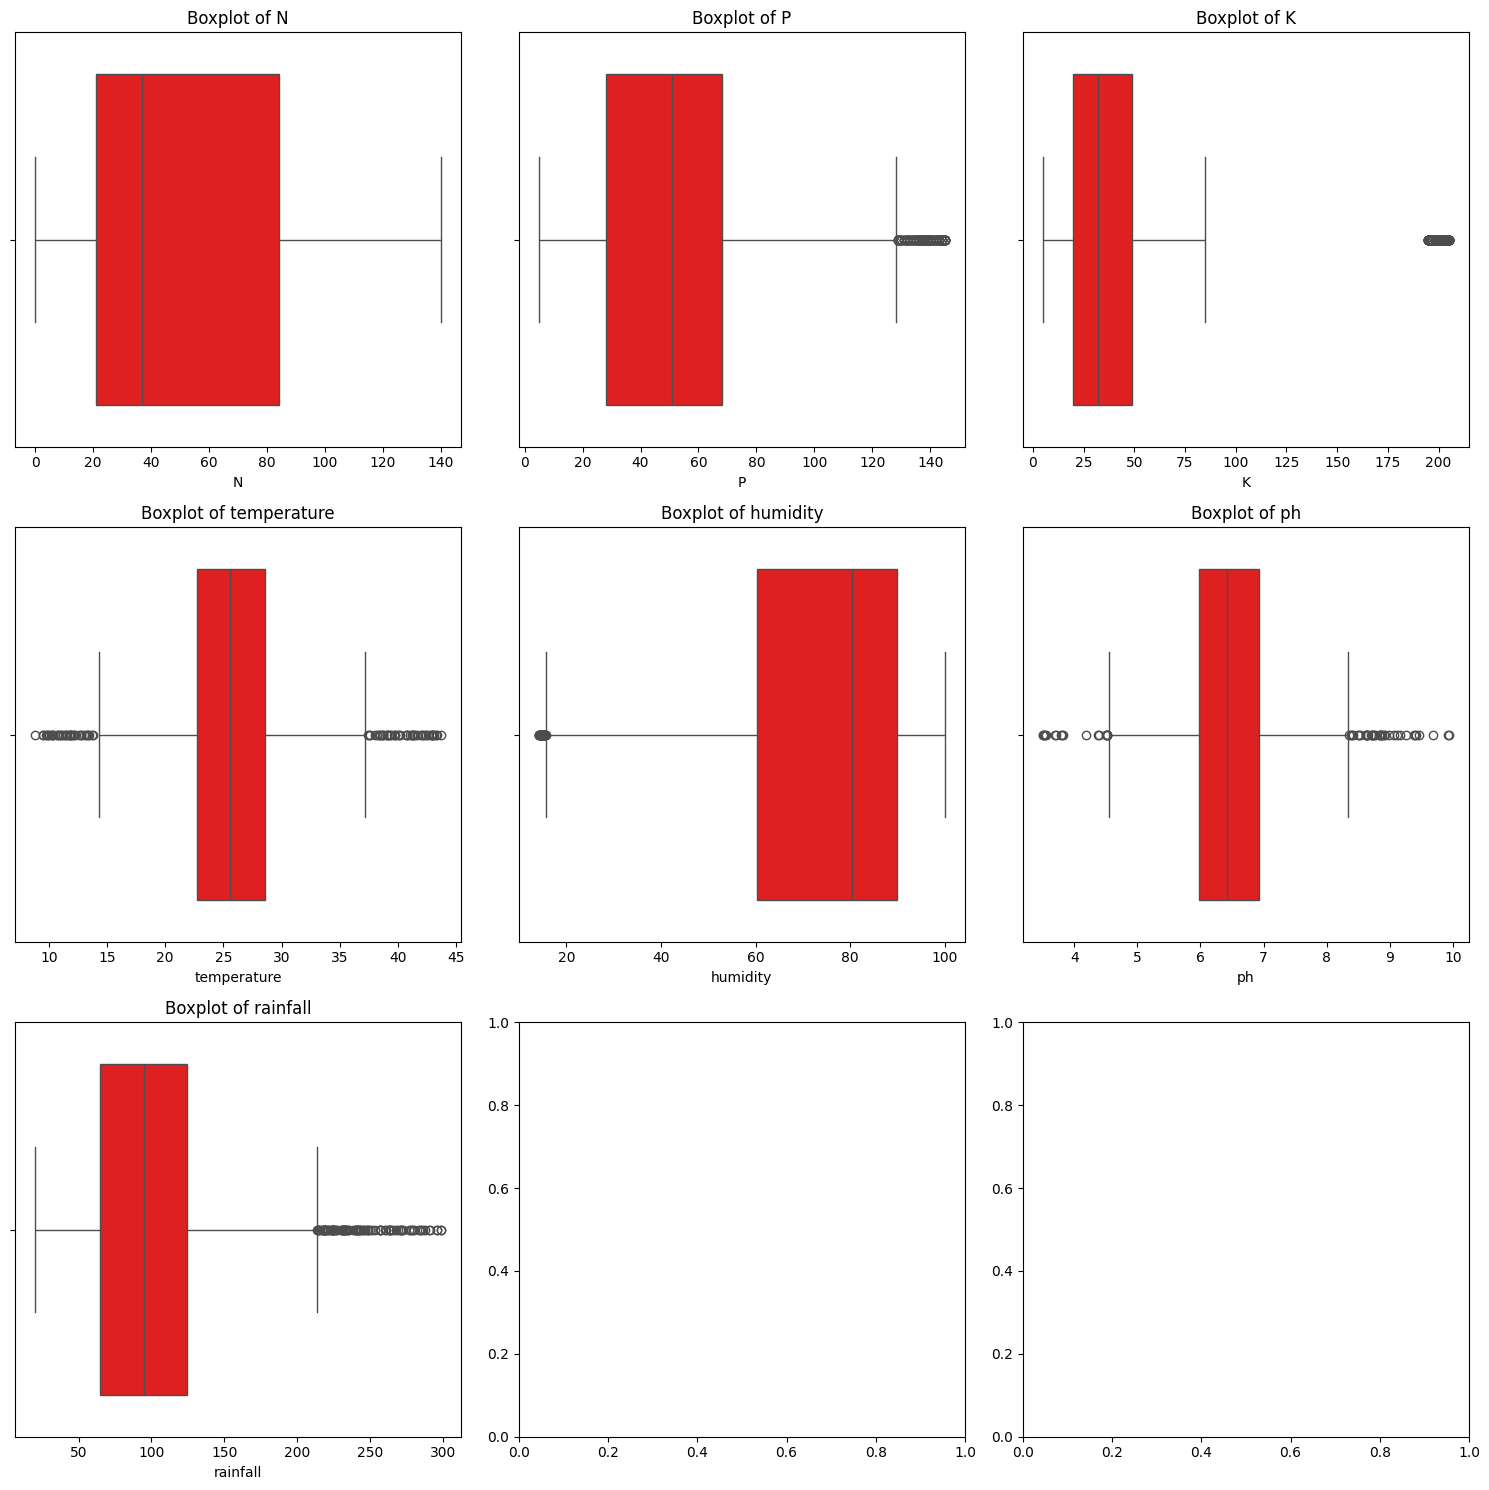

In [50]:
# 📌 3️⃣ Detecting Outliers Using Boxplots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for feature, subplot in zip(features, ax.flatten()):
    sns.boxplot(x=crop_data[feature], ax=subplot, color='red')
    subplot.set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

📊 Numerical Features (num_cols):
         N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

🔍 Correlation Matrix:
                     N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096

C:\Users\krpra\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


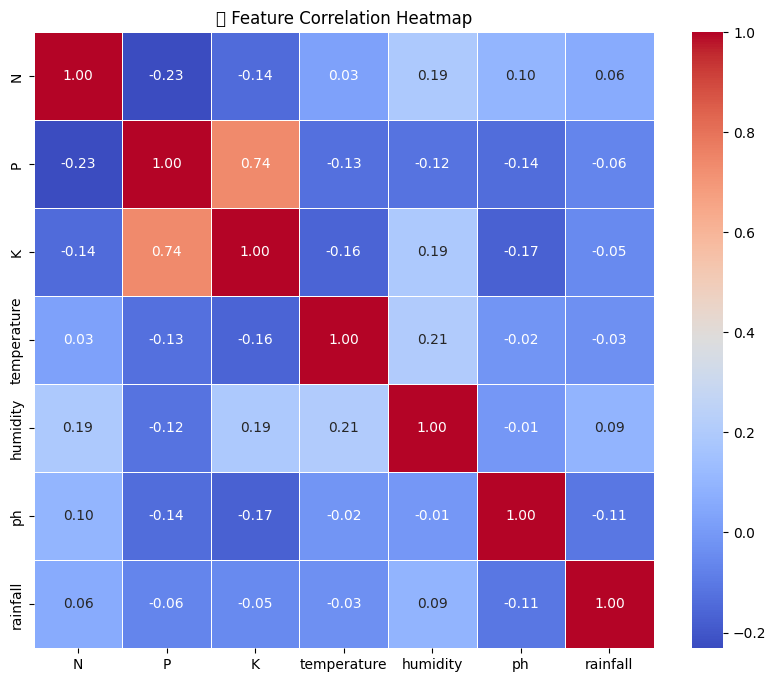

In [51]:
# 📌 4️⃣ Feature Correlation Analysis

# Selecting only numerical columns for correlation
num_cols = crop_data.select_dtypes(include=[np.number])  # Subset of numerical features
print("📊 Numerical Features (num_cols):\n", num_cols)  # Output the numerical features

# Compute correlation matrix
corr_matrix = num_cols.corr()  # Correlation matrix between numerical features
print("\n🔍 Correlation Matrix:\n", corr_matrix)  # Output the correlation matrix

# Visualizing Correlation with Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("📈 Feature Correlation Heatmap")
plt.show()


In [59]:
# 📌 5️⃣ Encoding the Target Variable ('label')
if 'label' in crop_data.columns:
    # Check unique labels in the 'label' column
    print("\n📝 Unique Labels in 'label' Column:", crop_data['label'].nunique())

    # Creating a dictionary for encoding the labels (Mapping label to numeric value)
    crop_dict = {label: idx for idx, label in enumerate(crop_data['label'].unique())}
    print("\n🔑 Label Encoding Dictionary:", crop_dict)

    # Mapping the 'label' column to a new 'crop_no' column
    crop_data['crop_no'] = crop_data['label'].map(crop_dict)
    print("\n💡 Dataset after Mapping 'label' to 'crop_no':")
    print(crop_data.head())  # Displaying first few rows

    # Dropping the original 'label' column
    crop_data.drop('label', axis=1, inplace=True)
    print("\n🗑️ Dataset after Dropping 'label' Column:")
    print(crop_data.head())  # Displaying first few rows after dropping 'label'

    # Display final dataset after encoding
    print("\n✅ Final Dataset after Encoding:")
    print(crop_data.tail())  # Displaying last few rows to verify the encoding
else:
    print("⚠ 'label' column not found. Please ensure that the column is present in the dataset.")


📝 Unique Labels in 'label' Column: 22

🔑 Label Encoding Dictionary: {'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}

💡 Dataset after Mapping 'label' to 'crop_no':
    N   P   K  temperature   humidity        ph    rainfall label  crop_no
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice        0
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice        0
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice        0
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice        0
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice        0

🗑️ Dataset after Dropping 'label' Column:
    N   P   K  temperature   humidity        ph    rainfall  crop_n